<a href="https://colab.research.google.com/github/FERMEN23/CNN/blob/main/GunAndHelmet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/roboflow-ai/Monk_Object_Detection.git

In [ ]:
! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

In [ ]:
#Version de tqmd para colab
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip

#IGNORE restart runtime warning, it is indeed installed 
#Arquitectura de red Efficeintnet
!pip install efficientnet_pytorch
!pip install tensorboardX

In [4]:
!curl -L "https://app.roboflow.com/ds/FYqnN0SFqi?key=1QO7DUdhb1 " > \
roboflow.zip; unzip roboflow.zip; \
rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   887  100   887    0     0   1553      0 --:--:-- --:--:-- --:--:--  1556
100 6753k  100 6753k    0     0  8452k      0 --:--:-- --:--:-- --:--:-- 8452k
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/Captura-de-pantalla-de-2020-09-16-21-21-34_png.rf.0ffa87dbd3628c18a2108e58542d688f.jpg  
 extracting: test/Captura-de-pantalla-de-2020-09-16-21-30-50_png.rf.a81c44aca5908b5aa360349f924d99cf.jpg  
 extracting: test/Captura-de-pantalla-de-2020-09-16-21-45-42_png.rf.c47ea50d7a3f99988eb0cd1367398619.jpg  
 extracting: test/Captura-de-pantalla-de-2020-09-16-21-47-12_png.rf.daf4313f4646fad64740dc46253e0c14.jpg  
 extracting: test/Captura-de-pantalla-de-2020-09-16-21-48-32_png.rf.2e4cb2df7f49a56e092f0e3661bb7c65.jpg  
 extracting: test/Captura-de-pa

In [5]:
#En las siguientes tres celdas, movemos los datos a una estructura que la biblioteca de detección de imágenes esperará
!mkdir War
!mkdir War/annotations
!mkdir War/Annotations
!mkdir War/Images

In [6]:
%cp train/_annotations.coco.json War/annotations/instances_Images.json

In [7]:
%cp train/*.jpg War/Images/

In [8]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [10]:
from train_detector import Detector

In [11]:
gtf = Detector();

In [12]:
#dirige el modelo hacia la estructura de archivos
root_dir = "./";
coco_dir = "War";
img_dir = "./";
set_dir = "Images";

In [53]:
#Preparar los datos
gtf.Train_Dataset(root_dir, coco_dir, img_dir, set_dir, batch_size=8, image_size=512, use_gpu=True)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [14]:
gtf.Model();

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth



Loaded pretrained weights for efficientnet-b0


In [15]:
gtf.Set_Hyperparams(lr=0.0001, val_interval=1, es_min_delta=0.0, es_patience=0)

In [16]:
%%time
gtf.Train(num_epochs=100, model_output_dir="trained/");

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Monk_Object_Detection/4_efficientdet/lib/src/model.py:251: TracerWarning: Using len to get tensor shape might cause the trace to be incorrect. Recommended usage would be tensor.shape[0]. Passing a tensor of different shape might lead to errors or silently give incorrect results.
  if len(inputs) == 2:
Monk_Object_Detection/4_efficientdet/lib/src/utils.py:84: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  image_shape = np.array(image_shape)
Monk_Object_Detection/4_efficientdet/lib/src/utils.py:96: TracerWarning: torch.from_numpy results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might caus

/usr/local/lib/python3.7/dist-packages/torch/onnx/symbolic_opset9.py:2720: UserWarning: Exporting aten::index operator with indices of type Byte. Only 1-D indices are supported. In any other case, this will produce an incorrect ONNX graph.
  warnings.warn("Exporting aten::index operator with indices of type Byte. "


faild onnx export


/usr/local/lib/python3.7/dist-packages/torch/onnx/symbolic_opset9.py:701: UserWarning: This model contains a squeeze operation on dimension 1 on an input with unknown shape. Note that if the size of dimension 1 of the input is not 1, the ONNX model will return an error. Opset version 11 supports squeezing on non-singleton dimensions, it is recommended to export this model using opset version 11 or higher.
  "version 11 or higher.")



faild onnx export



faild onnx export



faild onnx export



faild onnx export



faild onnx export



faild onnx export



faild onnx export



faild onnx export



faild onnx export



faild onnx export



faild onnx export



faild onnx export



faild onnx export



faild onnx export



faild onnx export



faild onnx export



faild onnx export



faild onnx export



faild onnx export



faild onnx export



faild onnx export



faild onnx export



CPU times: user 4h 27min 47s, sys: 5min 48s, total: 4h 33min 35s
Wall time: 4h 35min 9s


In [17]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [18]:
from infer_detector import Infer

In [19]:
gtf2 = Infer();

In [20]:
gtf2.Model(model_dir="trained/")

In [22]:
import json
with open('train/_annotations.coco.json') as json_file:
    data = json.load(json_file)
class_list = []
for category in data['categories']:
  class_list.append(category['name'])

class_list

['Objects', 'gun', 'helmet']

In [74]:
%%time
test_images = [f for f in os.listdir('test') if f.endswith('.jpg')]
import random
img_path = "test/" + random.choice(test_images);
duration, scores, labels, boxes = gtf2.Predict(img_path, class_list, vis_threshold=0.2);

Done. (0.194s)
CPU times: user 204 ms, sys: 21 ms, total: 225 ms
Wall time: 223 ms


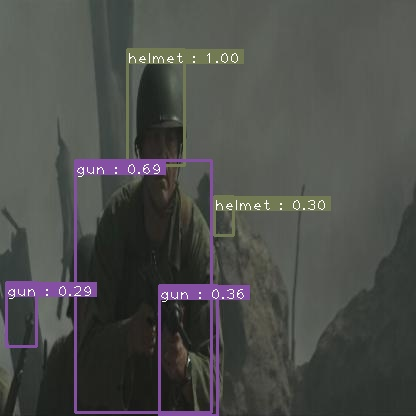

In [75]:
from IPython.display import Image
Image(filename='output.jpg') 

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
%mkdir trained_export
%cp ./trained/signatrix_efficientdet_coco.onnx ./trained_export/signatrix_efficientdet_coco_$(date +%F-%H:%M).onnx
%cp ./trained/signatrix_efficientdet_coco.pth ./trained_export/signatrix_efficientdet_coco_$(date +%F-%H:%M).pth
%mv ./trained_export/* /content/drive/My\ Drive/